# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernable landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

**Note**: Remember that the dataset can be found at `/data/landmark_images/` in the workspace.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
! pip install split-folders

In [2]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
import torch 
from torchvision import datasets, transforms
import splitfolders
import numpy as np


train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(), 
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229,  0.224,  0.225))
    ])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229,  0.224,  0.225)) 
])


splitfolders.ratio("/data/landmark_images/train", output="train_valid", seed=1337, ratio=(.8, .1, .1))
train_data = datasets.ImageFolder('./train_valid/train', transform=train_transform)
valid_data = datasets.ImageFolder('./train_valid/val', transform=test_transform)
test_data = datasets.ImageFolder('/data/landmark_images/test', transform=test_transform)

n_classes = len(train_data.classes)
classes = [class_.split(".")[1].replace("_", " ") for class_ in train_data.classes]


batch_size = 20 
train_loader = torch.utils.data.DataLoader(train_data, batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size, shuffle=True)



loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}



Copying files: 4996 files [00:13, 375.83 files/s]


**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: First, i import the libaries that i needed, then i transform portion of images for training dataset to be 224x224 pixels in size and with horizontal flip and 10 degree rotation.
Second, i applied some transformation for test dataset so for each input image it will be sized to 256x256 then we crob the center of the image by 16 pixels in all direction.
Third, for mean and std i did some research and i have that after so many calculation for imagenet mean and std, the best results are shown above in codde, here link where i found that https://pytorch.org/vision/stable/models.html

Forth, i split folders to be train, validation, test respectively and create dataloaders.



### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

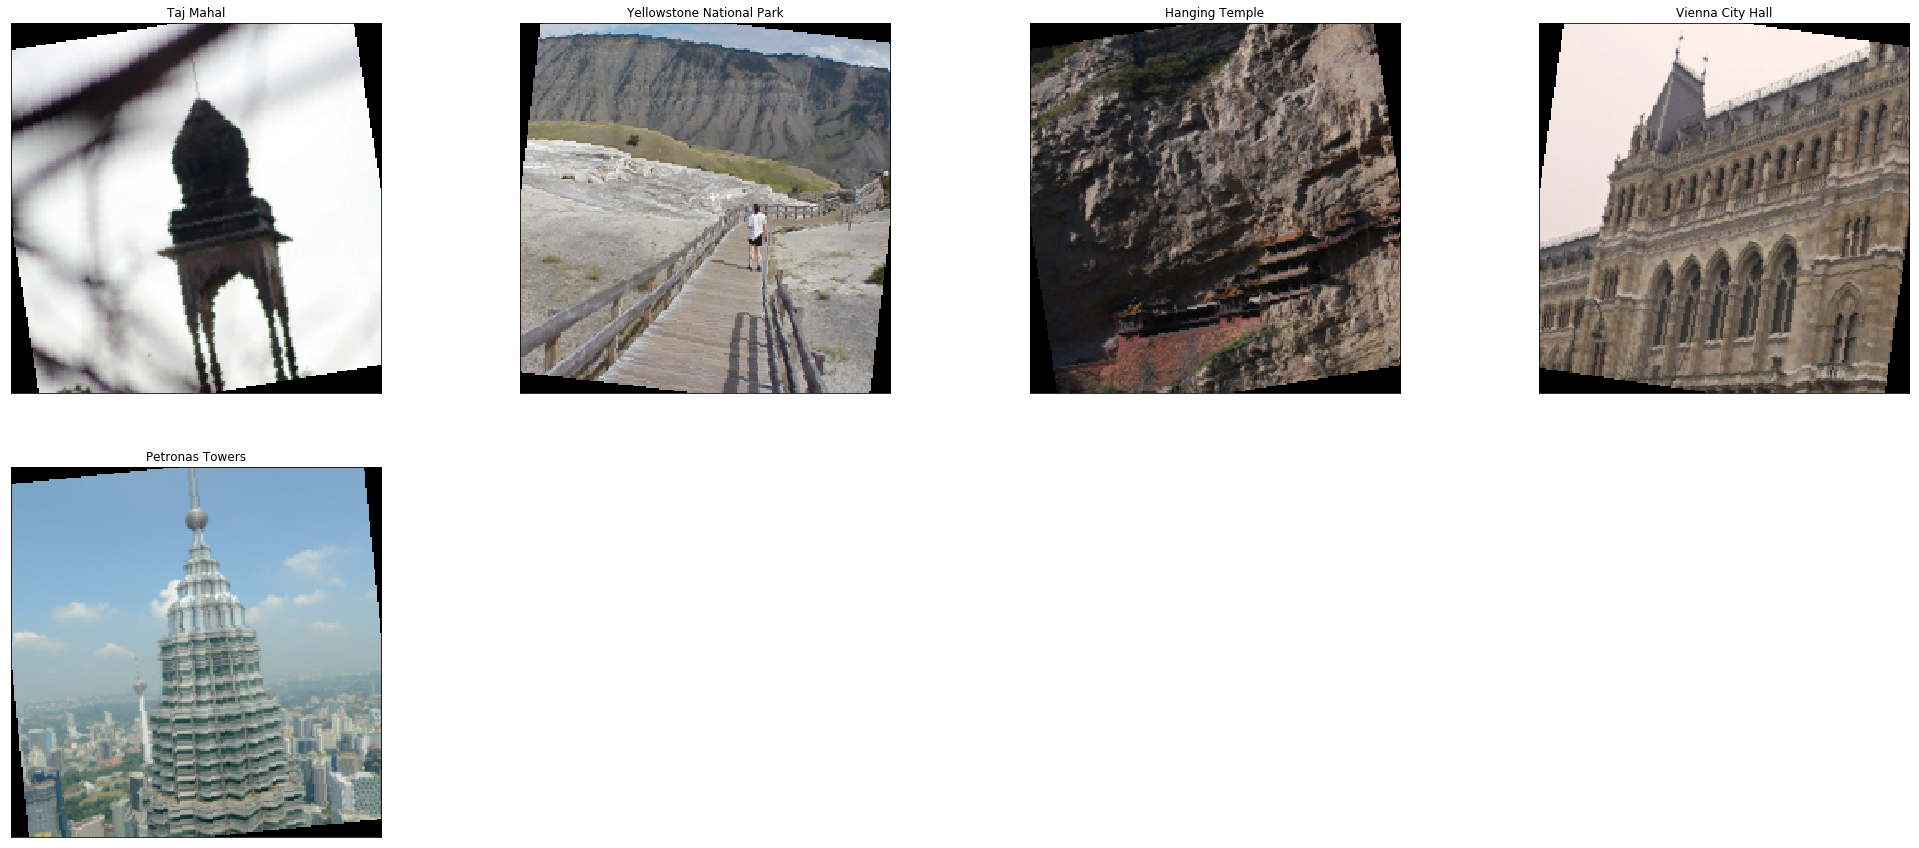

In [3]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

## TODO: visualize a batch of the train data loader
## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
s= torch.Tensor(std)
m= torch.Tensor(mean)
num = len(train_data)
fig = plt.figure(figsize=(35,64))
for idx in range(5):
    ax = fig.add_subplot(8, 4, idx+1, xticks=[], yticks=[], )
    random_image = random.randint(0, num)
    x= train_data[random_image][0] 
    image = x* s[:, None, None] + m [:, None, None]
    plt.imshow(np.transpose(image.numpy(), (1, 2, 0))) 
    class_name = classes[train_data[random_image][1]]
    ax.set_title(class_name)



### Initialize use_cuda variable

In [4]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [5]:
import torch.nn as nn
import torch.optim as optim

## TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss() 

def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer
    optimizer = optim.SGD(model.parameters(), lr=0.03)
    return optimizer

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [6]:
import torch.nn as nn

# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, 3, stride = 2, padding = 1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride = 2, padding = 1)
        self.conv3 = nn.Conv2d(64, 128, 3, stride = 1, padding = 1)
        
        
        self.pool = nn.MaxPool2d(2, 2)
        
        
        self.fc1 = nn.Linear(7*7*128, 500)
        self.fc2 = nn.Linear(500, n_classes)
        
        self.dropout = nn.Dropout(p=0.25)
        
        self.batch_norm2d = nn.BatchNorm2d(64)
        self.batch_norm1d = nn.BatchNorm1d(500)
        
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.2)
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(self.leaky_relu(self.conv1(x)))
        x = self.pool(self.leaky_relu(self.conv2(x)))
        x = self.batch_norm2d(x)
        x = self.pool(self.leaky_relu(self.conv3(x)))
        x = x.view(-1, 7*7*128)
        x = self.dropout(x)
        x = self.leaky_relu(self.fc1(x))
        x=self.batch_norm1d(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [7]:
! pip install torchsummary

In [8]:
from torchsummary import summary 

summary(model_scratch, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             896
         LeakyReLU-2         [-1, 32, 112, 112]               0
         MaxPool2d-3           [-1, 32, 56, 56]               0
            Conv2d-4           [-1, 64, 28, 28]          18,496
         LeakyReLU-5           [-1, 64, 28, 28]               0
         MaxPool2d-6           [-1, 64, 14, 14]               0
       BatchNorm2d-7           [-1, 64, 14, 14]             128
            Conv2d-8          [-1, 128, 14, 14]          73,856
         LeakyReLU-9          [-1, 128, 14, 14]               0
        MaxPool2d-10            [-1, 128, 7, 7]               0
          Dropout-11                 [-1, 6272]               0
           Linear-12                  [-1, 500]       3,136,500
        LeakyReLU-13                  [-1, 500]               0
      BatchNorm1d-14                  [

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__   for network archetecture, the model i build is :
•	Conv1 - 112x112x32 
•	Leaky relu activation function
•	Max pooling using a 2x2 kernel and a stride of 2
•	Conv2 - 28x28x64
•	Leaky relu activation function
•	Max pooling using a 2x2 kernel and a stride of 2
•	Batch Normalization (to accelerate the training)
•	Conv3 - 14x14x128 
•	Leaky relu activation function
•	Max pooling using a 2x2 kernel and a stride of 2
•	Dropout of 25% probability
•	Fully connected layer (7*7*128, 500) 
•	Leaky relu activation function
•	Batch Normalization (to accelerate the training)
•	Dropout of 30% probability (reduce overfitting) 
•	Fully connected layer (256, n_classes=50)

i tried to implement the convolution layers like this:
Conv2d(3, 16, 3)
 Conv2d(16, 32, 3)
 Conv2d(32, 64, 3 )
but i found that the number pf parameters will be around 14 million, therefore i adjust the size of the convolution to be as written above and it use around 4 million parameters. 
                
        

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [9]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step() 
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))

            
            

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step() 
            valid_loss += train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss))


        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss <= valid_loss_min:

            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [10]:
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    if isinstance(m, nn.Conv2d):
        n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
        m.weight.data.normal_(0, np.sqrt(2. / n))
        if m.bias is not None:
            m.bias.data.zero_()
    elif isinstance(m, nn.BatchNorm2d):
        m.weight.data.fill_(1)
        m.bias.data.zero_()
    elif isinstance(m, nn.Linear):
        n = m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.uniform_(-y, y)
        m.bias.data.zero_()


#-#-# Do NOT modify the code below this line. #-#-#
    
model_scratch.apply(custom_weight_init)
model_scratch = train(20, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                      criterion_scratch, use_cuda, 'ignore.pt')

Epoch: 1 	Training Loss: 3.598964 	Validation Loss: 50.311134
Epoch: 2 	Training Loss: 3.342643 	Validation Loss: 46.673320
Epoch: 3 	Training Loss: 3.192948 	Validation Loss: 44.580320
Epoch: 4 	Training Loss: 3.136496 	Validation Loss: 43.543976
Epoch: 5 	Training Loss: 3.030259 	Validation Loss: 41.823896
Epoch: 6 	Training Loss: 2.967528 	Validation Loss: 40.857005
Epoch: 7 	Training Loss: 2.929515 	Validation Loss: 40.153001
Epoch: 8 	Training Loss: 2.861040 	Validation Loss: 39.045595
Epoch: 9 	Training Loss: 2.810092 	Validation Loss: 38.223857
Epoch: 10 	Training Loss: 2.780313 	Validation Loss: 37.721507
Epoch: 11 	Training Loss: 2.755749 	Validation Loss: 37.245197
Epoch: 12 	Training Loss: 2.701405 	Validation Loss: 36.469389
Epoch: 13 	Training Loss: 2.717978 	Validation Loss: 36.539098
Epoch: 14 	Training Loss: 2.647454 	Validation Loss: 35.593371
Epoch: 15 	Training Loss: 2.630935 	Validation Loss: 35.225502
Epoch: 16 	Training Loss: 2.616254 	Validation Loss: 35.033065
E

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [11]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 10

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 3.630581 	Validation Loss: 50.777812
Epoch: 2 	Training Loss: 3.367481 	Validation Loss: 47.109226
Epoch: 3 	Training Loss: 3.257673 	Validation Loss: 45.464008
Epoch: 4 	Training Loss: 3.143704 	Validation Loss: 43.734749
Epoch: 5 	Training Loss: 3.049323 	Validation Loss: 42.211388
Epoch: 6 	Training Loss: 2.994098 	Validation Loss: 41.329806
Epoch: 7 	Training Loss: 2.907784 	Validation Loss: 40.052623
Epoch: 8 	Training Loss: 2.841509 	Validation Loss: 38.982382
Epoch: 9 	Training Loss: 2.802412 	Validation Loss: 38.248742
Epoch: 10 	Training Loss: 2.757728 	Validation Loss: 37.519868


### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [12]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.677297


Test Accuracy: 33% (418/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [13]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

loaders_transfer = loaders_scratch.copy()





### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [14]:
## TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss() 

def get_optimizer_transfer(model):
    ## TODO: select and return an optimizer
    optimizer = optim.SGD(model.classifier.parameters(), lr=0.03)
    return optimizer

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [15]:
## TODO: Specify model architecture
from torchvision import models
model_transfer = models.vgg16(pretrained=True)

for param in model_transfer.features.parameters():
    param.requires_grad = False

num_inputs = model_transfer.classifier[6].in_features
model_transfer.classifier[6] = nn.Linear(num_inputs, n_classes) 
#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:12<00:00, 45430778.25it/s]


__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  sence the VGG-16 model is the porposed transfer model in part 2,i replaces the last fully connected layer of the model with one of our own to prooduce an output of 50 classes, then i froze all parameyers of all feature layers except the classifier parameters for training 

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [16]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'


train(15, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer), criterion_transfer,
      use_cuda, 'model_transfer.pt')
#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.278111 	Validation Loss: 31.005906
Epoch: 2 	Training Loss: 1.651989 	Validation Loss: 22.030823
Epoch: 3 	Training Loss: 1.497494 	Validation Loss: 19.741275
Epoch: 4 	Training Loss: 1.344930 	Validation Loss: 17.636285
Epoch: 5 	Training Loss: 1.310618 	Validation Loss: 17.132812
Epoch: 6 	Training Loss: 1.216765 	Validation Loss: 15.898851
Epoch: 7 	Training Loss: 1.225849 	Validation Loss: 15.996885
Epoch: 8 	Training Loss: 1.131064 	Validation Loss: 14.756124
Epoch: 9 	Training Loss: 1.065765 	Validation Loss: 13.897067
Epoch: 10 	Training Loss: 1.089400 	Validation Loss: 14.196325
Epoch: 11 	Training Loss: 1.041652 	Validation Loss: 13.573414
Epoch: 12 	Training Loss: 0.989019 	Validation Loss: 12.891045
Epoch: 13 	Training Loss: 0.992377 	Validation Loss: 12.930399
Epoch: 14 	Training Loss: 0.960073 	Validation Loss: 12.500782
Epoch: 15 	Training Loss: 0.938969 	Validation Loss: 12.226393


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [17]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.846232


Test Accuracy: 79% (999/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [18]:
import cv2
from PIL import Image

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

def predict_landmarks(img_path, k):
    img = Image.open(img_path).convert('RGB')
    
    image_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    
    img = image_transform(img)
    img.unsqueeze_(0)
    
    if use_cuda:
        img = img.cuda()
        
    model_transfer.eval()
    output = model_transfer(img)
    Top_predicted , Top_id = output.topk(k)
    Top= [classes[class_id] for class_id in Top_id[0].tolist()]
    return Top
# test on a sample image   
predict_landmarks('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5)

['Golden Gate Bridge',
 'Forth Bridge',
 'Brooklyn Bridge',
 'Sydney Harbour Bridge',
 'Dead Sea']

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

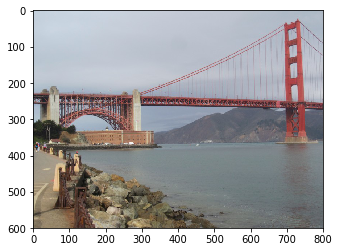

Actual Label: Golden Gate Bridge
Predicted Label in order: Is this picture of the
Golden Gate Bridge or Forth Bridge or Brooklyn Bridge


In [19]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    
    ## TODO: display image and display landmark predictions
    img = Image.open(img_path).convert('RGB')
    plt.imshow(img)
    plt.show()
    actual_label = img_path.split('/')[2][3:].replace('_',' ').split('.')[0]
    predicted_label1= predicted_landmarks[0]
    predicted_label2= predicted_landmarks[1]
    predicted_label3= predicted_landmarks[2]
    print("Actual Label: "+ actual_label )
    print("Predicted Label in order: Is this picture of the\n" + predicted_label1 + " or "+ predicted_label2+ " or "+ predicted_label3)
    

# test on a sample image
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
the algorithm works perfectly, but i think we should enhance with more:
1- Training the model with more related data
2- Find a perfect tunning to enhance the model efficiency (learning rate, number of epoochs...etc) 
3- add more convolution layers or more fully connected layers and see how the model behave  

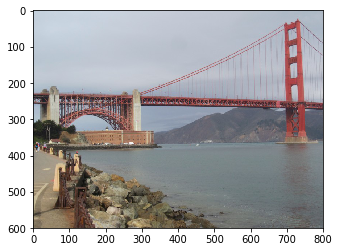

Actual Label: Golden Gate Bridge
Predicted Label in order: Is this picture of the
Golden Gate Bridge or Forth Bridge or Brooklyn Bridge


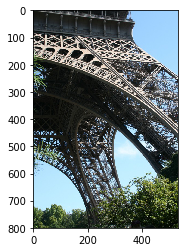

Actual Label: Eiffel Tower
Predicted Label in order: Is this picture of the
Eiffel Tower or Forth Bridge or Sydney Harbour Bridge


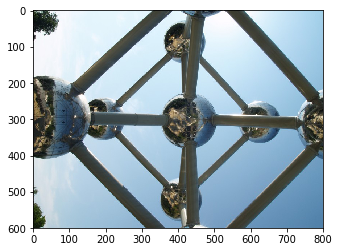

Actual Label: Atomium
Predicted Label in order: Is this picture of the
Atomium or Wroclaws Dwarves or Sydney Harbour Bridge


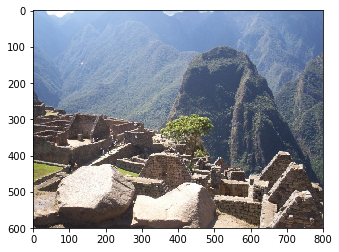

Actual Label: Machu Picchu
Predicted Label in order: Is this picture of the
Machu Picchu or Great Wall of China or Temple of Olympian Zeus


In [26]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')
suggest_locations('images/test/16.Eiffel_Tower/3828627c8730f160.jpg')
suggest_locations('images/test/37.Atomium/5ecb74282baee5aa.jpg')
suggest_locations('images/test/41.Machu_Picchu/4336abf3179202f2.jpg')


